# 2.3: Regularization (Housing-simple)

In this tutorial, you will be using a dataset consists of houses and its price and try to develop a model to estimate the price of a house if given its characteristics

## Importing the libraries

In [1]:
!pip -q install pandas-profiling
!pip -q install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

## Importing the dataset

In [3]:
# df = pd.read_csv("./data/Housing-simple.csv")
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1_VLG-QVuEQFaABcsXxWmG1ASV-SVcEoEvoFDH8pUN4A/gviz/tq?tqx=out:csv&sheet=Housing-simple')

In [4]:
#Check the data
df.head()

,price(100k),area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,133.00,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,122.50,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,122.50,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,122.15,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,114.10,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#check for general property of data (data type/ null entries)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price(100k)       545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price(100k),area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,47.667292,5150.541284,2.965138,1.286239,1.805505,0.693578
std,18.704396,2170.141023,0.738064,0.502470,0.867492,0.861586
min,17.500000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,34.300000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,43.400000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,57.400000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,133.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preprocessing

In [8]:
df.columns

Index(['price(100k)', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
#list of columns that are yes/no
binary_column = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea',]

In [10]:
#check unique values just to be sure
for c in binary_column:
    #print unique value of each column here
    print(df[c].unique())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']


In [11]:
#replacing yes with 1 and no with 0
for c in binary_column:
    #replacing value of yes/no of the columns here
    df[c]=df[c].replace("yes",1)
    df[c]=df[c].replace("no",0)

In [12]:
df.head()

,price(100k),area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,133.00,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,122.50,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,122.50,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,122.15,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,114.10,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [13]:
#check the number of each category of "furnishing status"
df["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [14]:
#convert "furnishingstatus" into one-hot encoding (dummy variable)
df=pd.get_dummies(df,columns=["furnishingstatus"])

In [15]:
df.head()

,price(100k),area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,133.00,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,122.50,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,122.50,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,122.15,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,114.10,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [16]:
df=df.drop(columns=["furnishingstatus_unfurnished"])

# Correlation Matrix

In [17]:
#Compute correlation matrix here
df.corr()

,price(100k),area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
price(100k),1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179


<Axes: >

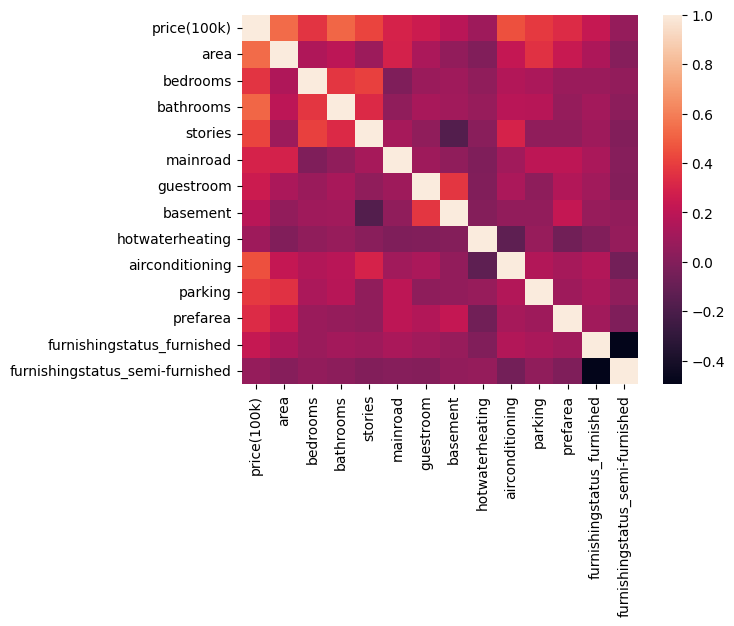

In [18]:
sns.heatmap(df.corr())

**plot ปัจจัยที่มีผลต่อ price ที่สุด จาก  correlation matrix**

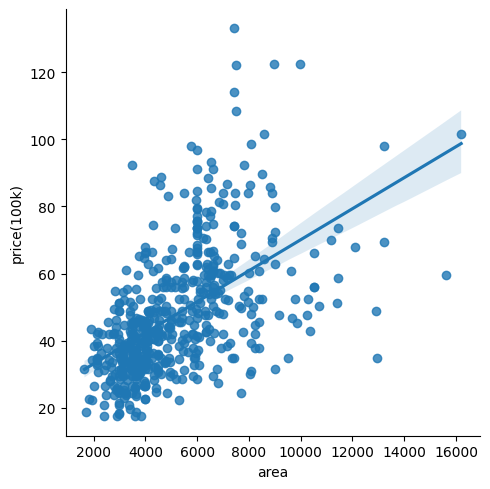

In [19]:
# plt.scatter(df["area"],df["price(100k)"])
sns.lmplot(x="area",y="price(100k)", data=df)

## Splitting the dataset into the Training set and Test set

In [20]:
y = df["price(100k)"]
X = df.drop(columns=["price(100k)"])

In [21]:
# Split data into training and test sets (30% test set)
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

## Scaling features

In [22]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
180,4500,4,2,1,0,0,1,0,1,2,0,0,1
189,3540,2,1,1,0,1,1,0,0,0,0,0,1
93,7200,3,2,1,1,0,1,0,1,3,0,0,1
444,3120,3,1,2,0,0,0,0,0,0,0,1,0
81,4000,3,2,2,1,0,1,0,1,1,0,0,1


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaling the desired columns (it's ok for 1/0 because it's min/max scaling)
# X_train.loc[:,["area","bedrooms","bathrooms","stories","parking"]]= scaler.fit_transform(X_train.loc[:,["area","bedrooms","bathrooms","stories","parking"]])
X_train.loc[:,:]= scaler.fit_transform(X_train.loc[:,:])

In [25]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
180,0.193103,0.6,0.333333,0.000000,0.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.0,1.0
189,0.126897,0.2,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0
93,0.379310,0.4,0.333333,0.000000,1.0,0.0,1.0,0.0,1.0,1.000000,0.0,0.0,1.0
444,0.097931,0.4,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
81,0.158621,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.0,1.0


## Training the MLR, Ridge, Lasso model on the Training set

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Multiple Regression Model
MLR = LinearRegression()
MLR.fit(X_train, y_train)

# Ridge Regression Model
ridge = Ridge()
ridge.fit(X_train, y_train)

# Lasso Regression Model
lasso = Lasso()
lasso.fit(X_train,y_train);

## Model Results

In [27]:
#Transform X_test with the same transformation as X_train
# X_test.loc[:,["area","bedrooms","bathrooms","stories","parking"]] = \
  # scaler.transform(X_test.loc[:,["area","bedrooms","bathrooms","stories","parking"]])

X_test.loc[:,:]= scaler.fit_transform(X_test.loc[:,:])

In [28]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
62,0.397403,0.666667,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,0.0,1.0,0.0
247,0.584416,0.666667,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
142,0.766234,0.666667,0.5,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0
107,0.412987,0.333333,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0
483,0.429870,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0


In [29]:
X_test.shape[1]

13

In [30]:
#Note that score() gives us r2 score
print("MLR Training Set Score:{:.2f}".format(MLR.score(X_train, y_train)))
print("MLR Test Set Score:{:.2f}".format(MLR.score(X_test, y_test)))

MLR Training Set Score:0.68
MLR Test Set Score:0.62


In [31]:
#Ridge performs a little bit worse for training, but generalize a little better
print("Ridge Training Set Score:{:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge Test Set Score:{:.2f}".format(ridge.score(X_test, y_test)))

print("Total number of features:{}".format(X_train.shape[1]))
print("Number of features used for Ridge:{}".format(np.sum(ridge.coef_ !=0)))

Ridge Training Set Score:0.68
Ridge Test Set Score:0.64
Total number of features:13
Number of features used for Ridge:13


### TODO: Lasso

In [32]:
# Lasso Regression
print("Lasso Training Set Score:{:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso Test Set Score:{:.2f}".format(lasso.score(X_test, y_test)))

print("Total number of features:{}".format(X_train.shape[1]))
print("Number of features used for Lasso:{}".format(np.sum(lasso.coef_ !=0)))

Lasso Training Set Score:0.44
Lasso Test Set Score:0.47
Total number of features:13
Number of features used for Lasso:10


Why does Lasso provide relatively poor performance compared to MLR and Ridge?

It turns out Lasso, by default, sets the regularization parameter `alpha` as 1.0 which turns out to be a bit too restrictive. Setting smaller `alpha` for Lasso improves its performance. See below.

## Regularization

Now we're studying the impact of regularization parameters (in sklearn it's called "alpha", not "lambda" like in the slides)

In [33]:
#Notice the regularization effects
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
print("Ridge100 Training Set Score:{:.2f}".format(ridge100.score(X_train, y_train)))
print("Ridge100 Test Set Score:{:.2f}".format(ridge100.score(X_test, y_test)))
print()

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge10 Training Set Score:{:.2f}".format(ridge10.score(X_train, y_train)))
print("Ridge10 Test Set Score:{:.2f}".format(ridge10.score(X_test, y_test)))
print()

ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("Ridge1 Training Set Score:{:.2f}".format(ridge1.score(X_train, y_train)))
print("Ridge1 Test Set Score:{:.2f}".format(ridge1.score(X_test, y_test)))
print()

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge01 Training Set Score:{:.2f}".format(ridge01.score(X_train, y_train)))
print("Ridge01 Test Set Score:{:.2f}".format(ridge01.score(X_test, y_test)))
print()

ridge00001 = Ridge(alpha=0.0001).fit(X_train, y_train)
print("Ridge00001 Training Set Score:{:.2f}".format(ridge00001.score(X_train, y_train)))
print("Ridge00001 Test Set Score:{:.2f}".format(ridge00001.score(X_test, y_test)))

Ridge100 Training Set Score:0.40
Ridge100 Test Set Score:0.43

Ridge10 Training Set Score:0.64
Ridge10 Test Set Score:0.66

Ridge1 Training Set Score:0.68
Ridge1 Test Set Score:0.64

Ridge01 Training Set Score:0.68
Ridge01 Test Set Score:0.63

Ridge00001 Training Set Score:0.68
Ridge00001 Test Set Score:0.62


### TODO: Lasso

In [38]:
lasso100 = Lasso(alpha=100 ).fit(X_train, y_train)
print("Lasso_100 Training Set Score:{:.2f}".format(lasso100.score(X_train, y_train)))
print("Lasso_100 Test Set Score:{:.2f}".format(lasso100.score(X_test, y_test)))
print()

lasso10 = Lasso(alpha=10).fit(X_train, y_train)
print("Lasso_10 Training Set Score:{:.2f}".format(lasso10.score(X_train, y_train)))
print("Lasso_10 Test Set Score:{:.2f}".format(lasso10.score(X_test, y_test)))
print()

lasso1 = Lasso(alpha=1).fit(X_train, y_train)
print("Lasso_1 Training Set Score:{:.2f}".format(lasso1.score(X_train, y_train)))
print("Lasso_1 Test Set Score:{:.2f}".format(lasso1.score(X_test, y_test)))
print()

lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
print("Lasso_01 Training Set Score:{:.2f}".format(lasso01.score(X_train, y_train)))
print("Lasso_01 Test Set Score:{:.2f}".format(lasso01.score(X_test, y_test)))
print()

lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Lasso_00001 Training Set Score:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("Lasso_00001 Test Set Score:{:.2f}".format(lasso00001.score(X_test, y_test)))

Lasso_100 Training Set Score:0.00
Lasso_100 Test Set Score:-0.00

Lasso_10 Training Set Score:0.00
Lasso_10 Test Set Score:-0.00

Lasso_1 Training Set Score:0.44
Lasso_1 Test Set Score:0.47

Lasso_01 Training Set Score:0.68
Lasso_01 Test Set Score:0.63

Lasso_00001 Training Set Score:0.68
Lasso_00001 Test Set Score:0.62


When `alpha` is too large, the model underfits: it performs poorly both on training and test sets.

## Inspecting coefficients

In [35]:
#MLR
MLR_coeff_df = pd.DataFrame(MLR.coef_,X.columns,columns=['Coefficient'])
MLR_coeff_df

,Coefficient
area,35.820219
bedrooms,2.042315
bathrooms,30.634186
stories,15.774962
mainroad,4.705169
guestroom,2.744028
basement,5.476538
hotwaterheating,8.173771
airconditioning,6.144333
parking,8.192115


In [36]:
Ridge_coeff_df = pd.DataFrame(ridge1.coef_,X.columns,columns=['Coefficient'])
Ridge_coeff_df

,Coefficient
area,31.759118
bedrooms,3.462252
bathrooms,28.149591
stories,15.335410
mainroad,5.043387
guestroom,2.992633
basement,5.304813
hotwaterheating,7.676597
airconditioning,6.360561
parking,8.612691


### TODO: Lasso
Try changing to observe coefficient at different regularization value

In [37]:
Lasso_coeff_df = pd.DataFrame(lasso01.coef_,X.columns,columns=['Coefficient'])
Lasso_coeff_df

,Coefficient
area,32.572431
bedrooms,0.000000
bathrooms,29.042226
stories,15.475326
mainroad,4.450726
guestroom,2.516145
basement,5.315673
hotwaterheating,5.987752
airconditioning,6.096018
parking,8.298817
